**有使用Chatgpt、Gemini生成code**

In [ ]:
# ========== Colab 檔案上傳 ==========
from google.colab import files
uploaded = files.upload()

Saving O-A0038-003.xml to O-A0038-003.xml


In [ ]:
import xml.etree.ElementTree as ET
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Normalization
from tensorflow.keras.optimizers import Adam

# ========== 1. 讀取 XML 資料 ==========
tree = ET.parse("O-A0038-003.xml")
root = tree.getroot()

ns = {"ns": "urn:cwa:gov:tw:cwacommon:0.1"}
content = root.find(".//ns:Content", ns).text.strip()
# 先按行拆
lines = content.strip().split("\n")

# 每一行再按逗號拆
rows = [line.split(",") for line in lines]

# 轉成浮點數 (去掉空白)
values = np.array([[float(x) for x in row if x.strip() != ""] for row in rows])

In [ ]:
# ========== 2. 建立分類與回歸資料集 ==========
X_class, y_class = [], []
X_reg, y_reg = [], []

for i in range(values.shape[0]):   # i=0 在最上面
    for j in range(values.shape[1]):
        val = values[i, j]
        lon = 120.00 + j * 0.03
        lat = 21.88 + i * 0.03

        # 分類資料 (全部都要)
        label = 0 if val == -999.0 else 1
        X_class.append([lon, lat])
        y_class.append(label)

        # 回歸資料 (只保留有效值)
        if val != -999.0:
            X_reg.append([lon, lat])
            y_reg.append(val)

X_class, y_class = np.array(X_class), np.array(y_class)
X_reg, y_reg = np.array(X_reg), np.array(y_reg)

In [ ]:
# ========== 3. 分割資料 ==========
Xc_train, Xc_test, yc_train, yc_test = train_test_split(X_class, y_class, test_size=0.2, random_state=42)
Xr_train, Xr_test, yr_train, yr_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [ ]:
# ========== 4. 分類模型 ==========
normalizer=Normalization(axis=-1)
normalizer.adapt(Xc_train)
clf_model = Sequential([
    normalizer,
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])
clf_model.compile(optimizer=Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])
clf_history = clf_model.fit(Xc_train, yc_train, validation_data=(Xc_test, yc_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5704 - loss: 0.6422 - val_accuracy: 0.9422 - val_loss: 0.2514
Epoch 2/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9420 - loss: 0.1997 - val_accuracy: 0.9664 - val_loss: 0.1147
Epoch 3/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9559 - loss: 0.1215 - val_accuracy: 0.9726 - val_loss: 0.0923
Epoch 4/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9603 - loss: 0.0982 - val_accuracy: 0.9726 - val_loss: 0.0838
Epoch 5/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9647 - loss: 0.0907 - val_accuracy: 0.9695 - val_loss: 0.0864
Epoch 6/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9682 - loss: 0.0813 - val_accuracy: 0.9677 - val_loss: 0.0842
Epoch 7/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9697 - loss: 0.0762 - val_accuracy: 0.9751 - val_loss: 0.0733
Epoch 8/100
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9691 - loss: 0.0763 - val_accu

In [ ]:
# ========== 5. 回歸模型 ==========
normalizer=Normalization(axis=-1)
normalizer.adapt(Xr_train)
reg_model = Sequential([
    normalizer,
    Dense(64, activation='relu', input_shape=(2,)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])
reg_model.compile(optimizer=Adam(0.001), loss='mse', metrics=['mae'])
reg_history = reg_model.fit(Xr_train, yr_train, validation_data=(Xr_test, yr_test), epochs=100, batch_size=32, verbose=1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 430.8022 - mae: 19.6991 - val_loss: 51.2461 - val_mae: 6.1336
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 35.9385 - mae: 4.8456 - val_loss: 21.2231 - val_mae: 3.6438
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 20.1519 - mae: 3.5760 - val_loss: 18.3103 - val_mae: 3.3703
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.5567 - mae: 3.3676 - val_loss: 17.1589 - val_mae: 3.1978
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 18.1221 - mae: 3.2764 - val_loss: 16.7740 - val_mae: 3.0794
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.6209 - mae: 3.1405 - val_loss: 16.4536 - val_mae: 3.1778
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16.5840 - mae: 3.1965 - val_loss: 15.8268 - val_mae: 3.0619
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.0234 - mae: 3.1931 - val_loss: 15.5100 - val_mae: 3.0313
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss:

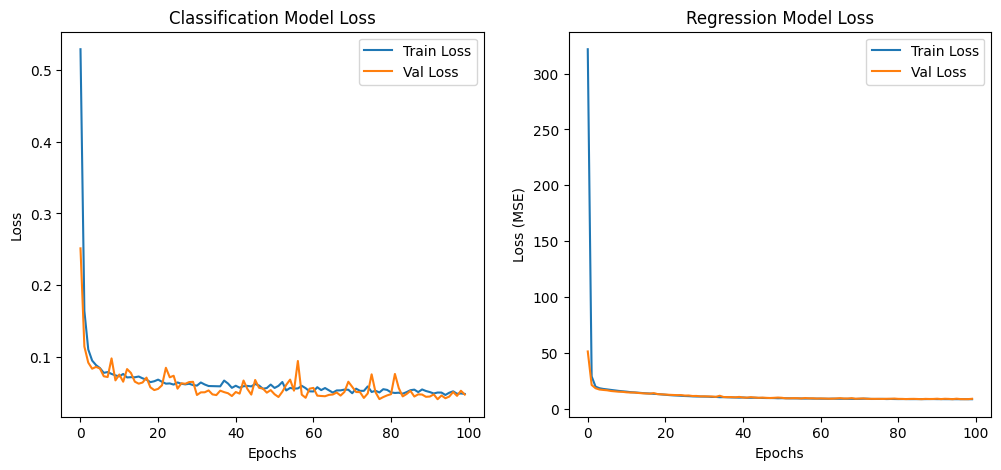

In [ ]:
# ========== 6. 繪製 Loss ==========
plt.figure(figsize=(12, 5))

# 分類模型loss
plt.subplot(1, 2, 1)
plt.plot(clf_history.history['loss'], label='Train Loss')
plt.plot(clf_history.history['val_loss'], label='Val Loss')
plt.title("Classification Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# 回歸模型loss
plt.subplot(1, 2, 2)
plt.plot(reg_history.history['loss'], label='Train Loss')
plt.plot(reg_history.history['val_loss'], label='Val Loss')
plt.title("Regression Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.legend()

plt.show()

In [ ]:
# Evaluate the classification model
clf_loss, clf_accuracy = clf_model.evaluate(Xc_test, yc_test, verbose=0)
print(f"Classification Model ： Test Loss {clf_loss:.4f}, 預測精準度 {clf_accuracy:.2%}")

# Evaluate the regression model
reg_loss, reg_mae = reg_model.evaluate(Xr_test, yr_test, verbose=0)
print(f"Regression Model ： Test Loss (MSE) {reg_loss:.4f}, 平均溫度絕對誤差 {reg_mae:.4f} 度")

Classification Model ： Test Loss 0.0478, 預測精準度 97.89%
Regression Model ： Test Loss (MSE) 8.8491, 平均溫度絕對誤差 2.1470 度


110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


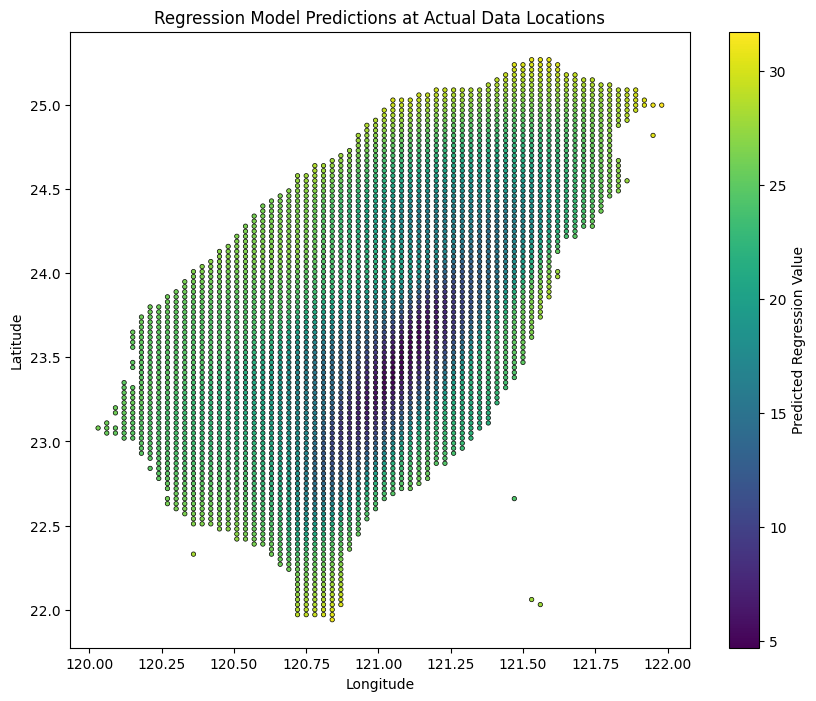

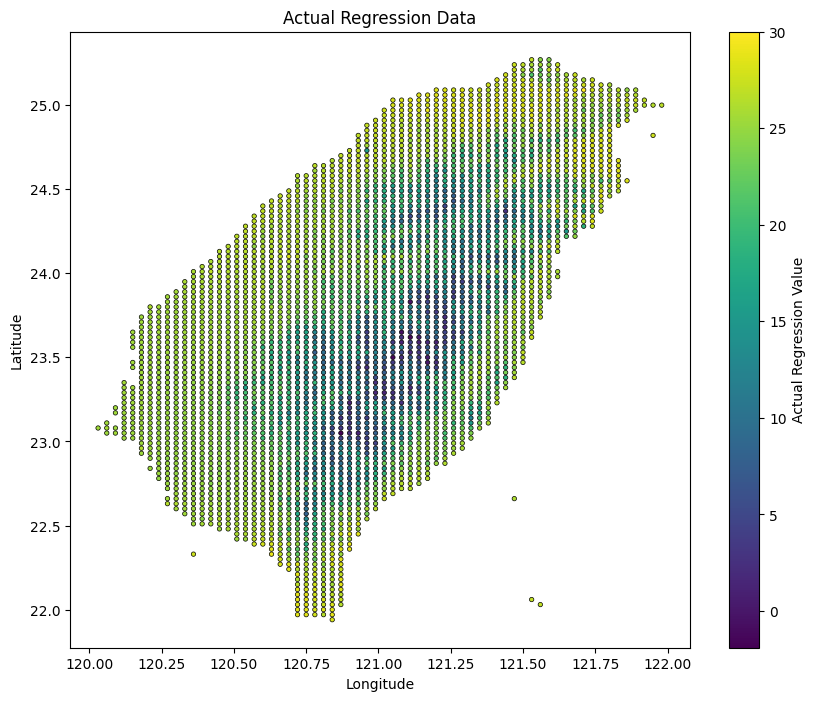

In [ ]:
# Plot the regression model predictions at the actual data locations
plt.figure(figsize=(10, 8))

# Make predictions on the actual regression data points
predictions_at_actual_locations = reg_model.predict(X_reg).flatten()

scatter = plt.scatter(X_reg[:, 0], X_reg[:, 1], c=predictions_at_actual_locations, cmap='viridis', s=10, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Predicted Regression Value')
plt.title('Regression Model Predictions at Actual Data Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Plot the actual regression data points
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_reg[:, 0], X_reg[:, 1], c=y_reg, cmap='viridis', s=10, edgecolors='black', linewidth=0.5)
plt.colorbar(scatter, label='Actual Regression Value')
plt.title('Actual Regression Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

252/252 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


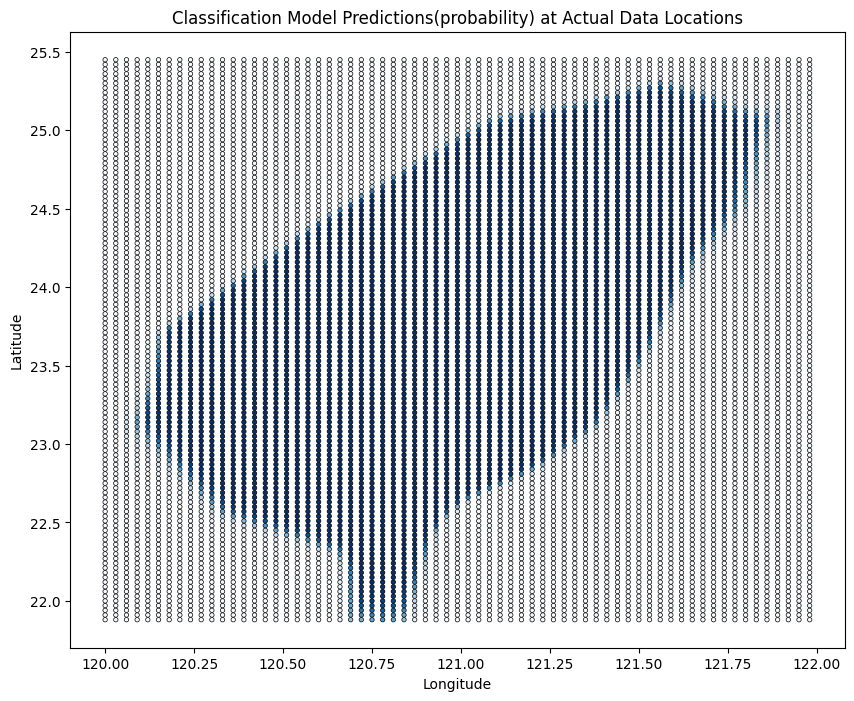

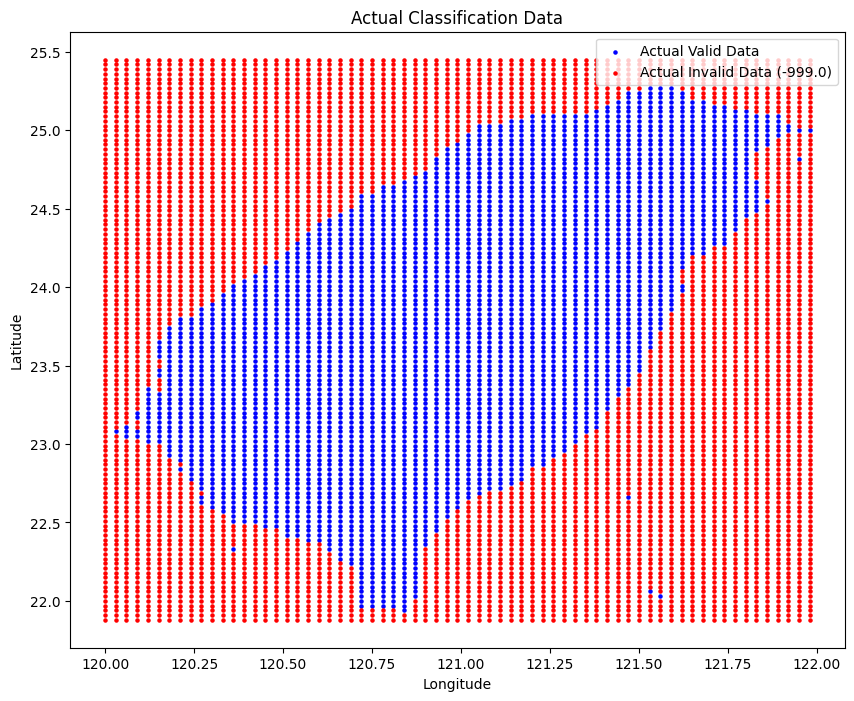

In [ ]:
# Make predictions on the actual classification data locations (probability of being class 1)
predictions_class_prob_at_actual_locations = clf_model.predict(X_class).flatten()

# Plot the classification predictions at actual data locations
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_class[:, 0], X_class[:, 1], c=predictions_class_prob_at_actual_locations, cmap='Blues', s=10, edgecolors='black', linewidth=0.5)
plt.title('Classification Model Predictions(probability) at Actual Data Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Plot the actual classification data points (valid vs invalid)
plt.figure(figsize=(10, 8))
plt.scatter(X_class[y_class == 1, 0], X_class[y_class == 1, 1], c='blue', label='Actual Valid Data', s=5)
plt.scatter(X_class[y_class == 0, 0], X_class[y_class == 0, 1], c='red', label='Actual Invalid Data (-999.0)', s=5)
plt.title('Actual Classification Data')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()